In [1]:
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# 선형회귀분석 모델
import statsmodels.formula.api as smf
# 회귀분석의 정규성 확인: qqplot, add_constant
from statsmodels.api import qqplot, add_constant
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 학습용/평가용 데이터 분리: train/test
from sklearn.model_selection import train_test_split
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가 함수
from sklearn.metrics import r2_score
# 선형 모델 
from sklearn.linear_model import Ridge, Lasso, ElasticNet


# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

# 한글 폰트 설정 (맑은 고딕)
matplotlib.rc("font", family='Malgun Gothic')
matplotlib.rc("axes", unicode_minus=False)
matplotlib.rcParams["font.family"] = 'NanumGothic'

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')


## 데이터 불러오기

In [2]:
df_train_x= pd.read_csv("./data/df_train1_x.txt", usecols=lambda column: column != "Unnamed: 0")
df_train_y= pd.read_csv("./data/df_train1_y.txt", usecols=lambda column: column != "Unnamed: 0")
df_test_x= pd.read_csv("./data/df_valid_x.txt", usecols=lambda column: column != "Unnamed: 0")
df_test_y= pd.read_csv("./data/df_valid_y.txt", usecols=lambda column: column != "Unnamed: 0")

In [3]:
df_train_x.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size,GDP_Group,Brand_Segment,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2015,33425,1,5.0,17.43,1396.0,105.50,9,3713.889,2,4,2,0,0,0,1,1
1,2011,62148,1,5.0,11.70,1796.0,178.00,13,4780.615,2,4,4,0,0,0,1,1
2,2012,106000,1,8.0,12.99,2494.0,100.00,12,8833.333,3,4,3,1,0,0,0,1
3,2015,27000,1,5.0,17.97,1498.0,99.60,9,3000.000,2,3,2,0,0,0,1,0
4,2015,24350,2,5.0,19.81,1086.0,68.05,9,2705.556,2,4,2,0,0,0,1,1


In [4]:
df_train_y.head()

,Price
0,6898.32
1,13490.05
2,12876.86
3,10347.48
4,4598.88


# 경향성 파악

## 산점도를 통한 경향성 파악

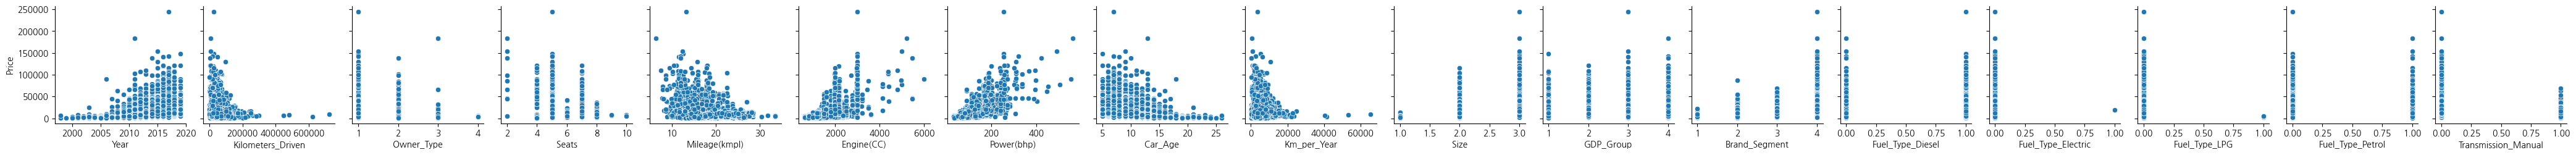

In [5]:
# 48 Page
# 산점도 행렬:목표변수와 설명변수 지정
df_combined = pd.concat([df_train_x, df_train_y], axis=1)
sns.pairplot(df_combined, y_vars="Price" ,x_vars=df_combined.drop(df_combined.columns[17], axis=1).columns)

In [6]:
# 테스트 데이터 합치기
df_test = pd.concat([df_test_x, df_test_y], axis=1)

df_test['Price_log'] = np.log1p(df_test['Price'])

In [7]:
df_combined.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size,GDP_Group,Brand_Segment,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Price
0,2015,33425,1,5.0,17.43,1396.0,105.50,9,3713.889,2,4,2,0,0,0,1,1,6898.32
1,2011,62148,1,5.0,11.70,1796.0,178.00,13,4780.615,2,4,4,0,0,0,1,1,13490.05
2,2012,106000,1,8.0,12.99,2494.0,100.00,12,8833.333,3,4,3,1,0,0,0,1,12876.86
3,2015,27000,1,5.0,17.97,1498.0,99.60,9,3000.000,2,3,2,0,0,0,1,0,10347.48
4,2015,24350,2,5.0,19.81,1086.0,68.05,9,2705.556,2,4,2,0,0,0,1,1,4598.88


In [8]:
# 로그 해보기

In [9]:
df_log = df_combined.copy()

In [10]:
df_log['Price_log'] = np.log1p(df_log['Price'])

## 변수들의 분포 확인(정규성,hist)

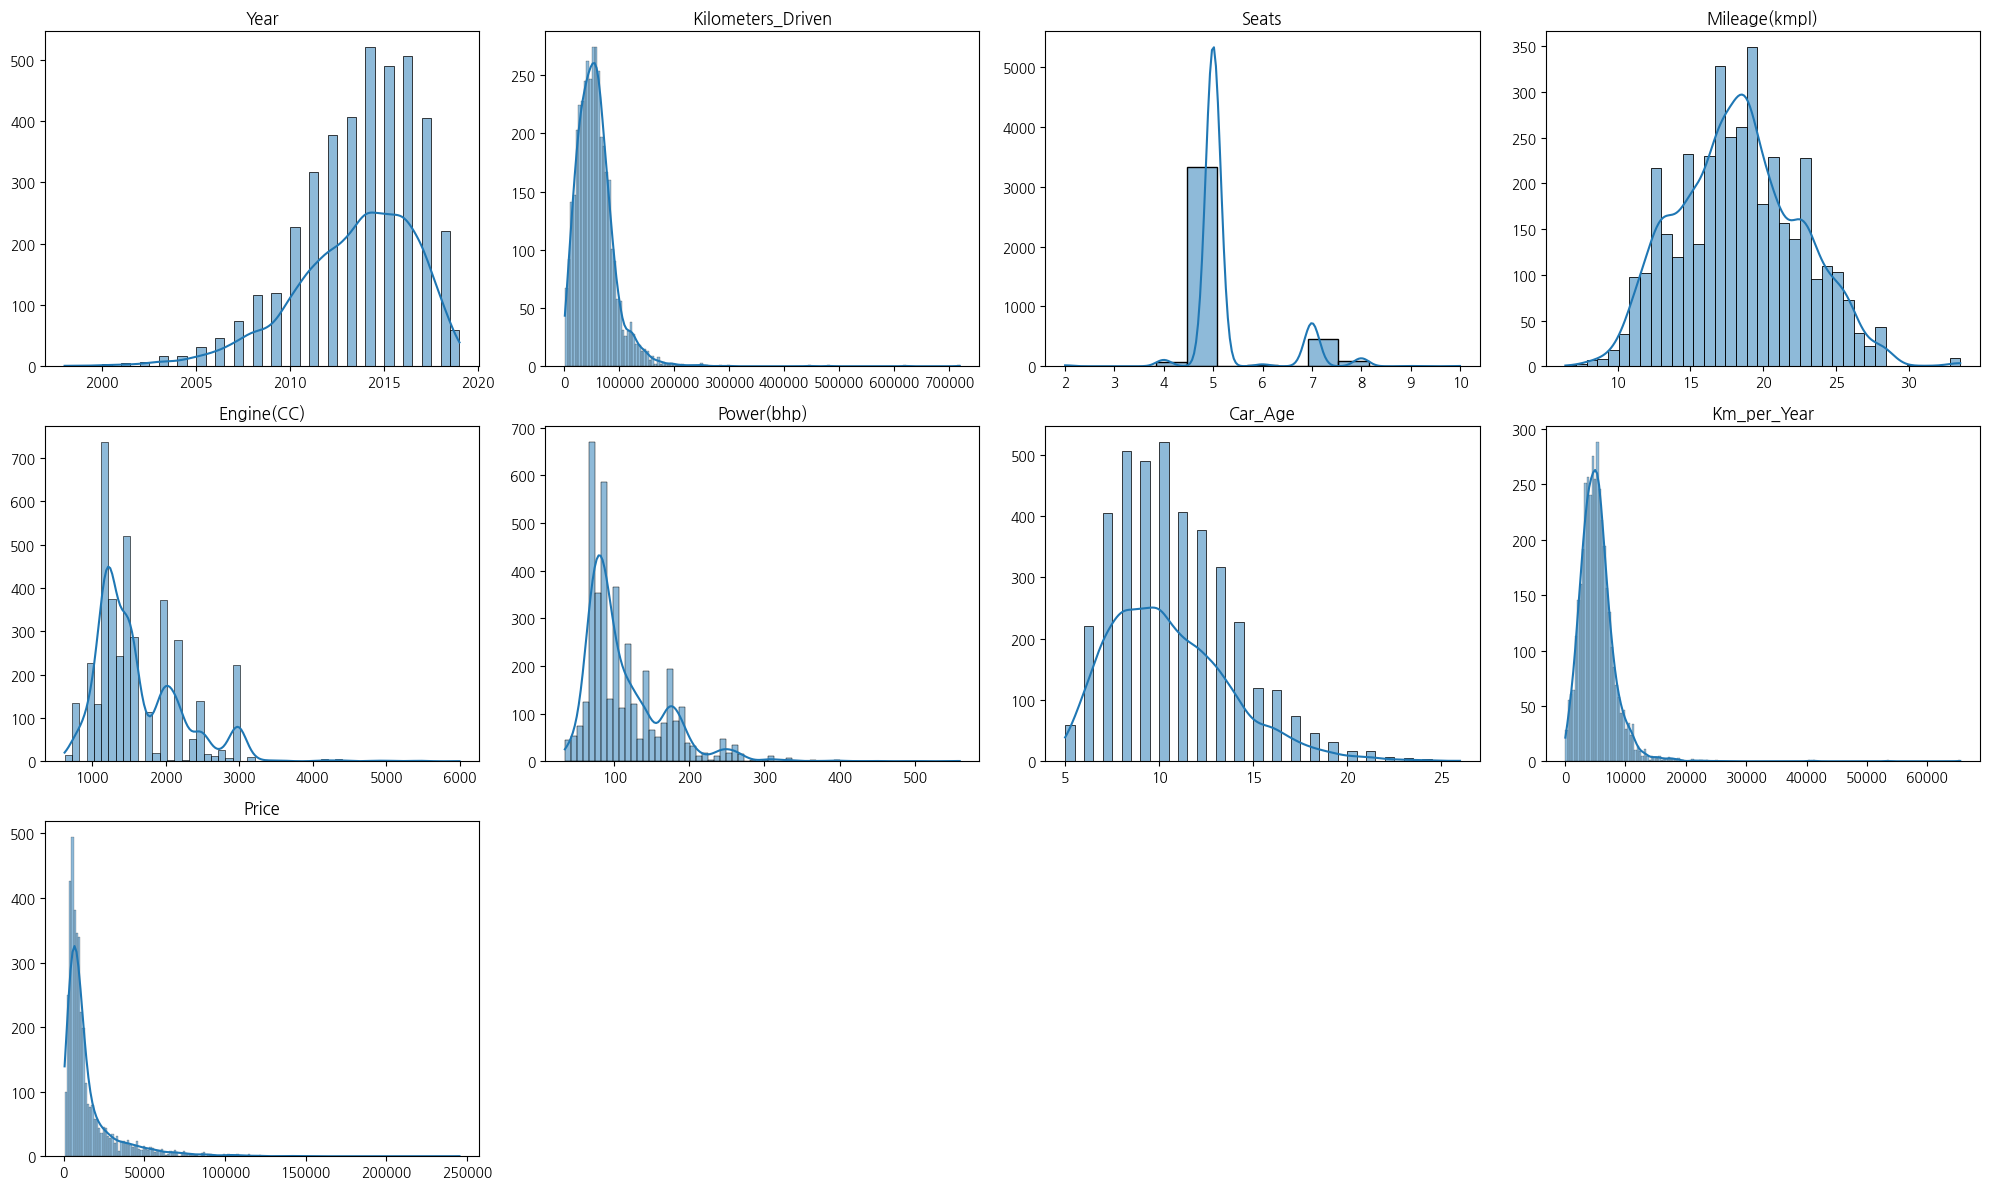

In [11]:
#

import matplotlib.pyplot as plt
import seaborn as sns

# 분석 대상 컬럼 리스트
cols = ['Year', 'Kilometers_Driven', 'Seats', 'Mileage(kmpl)', 'Engine(CC)',
        'Power(bhp)', 'Car_Age', 'Km_per_Year', 'Price']

# 서브플롯 설정 (3행 4열 레이아웃, 여유 있게)
plt.figure(figsize=(20, 12))
for i, col in enumerate(cols):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df_combined[col].dropna(), kde=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


## 변수의 분포 확인(정규성, hist)+Price_log

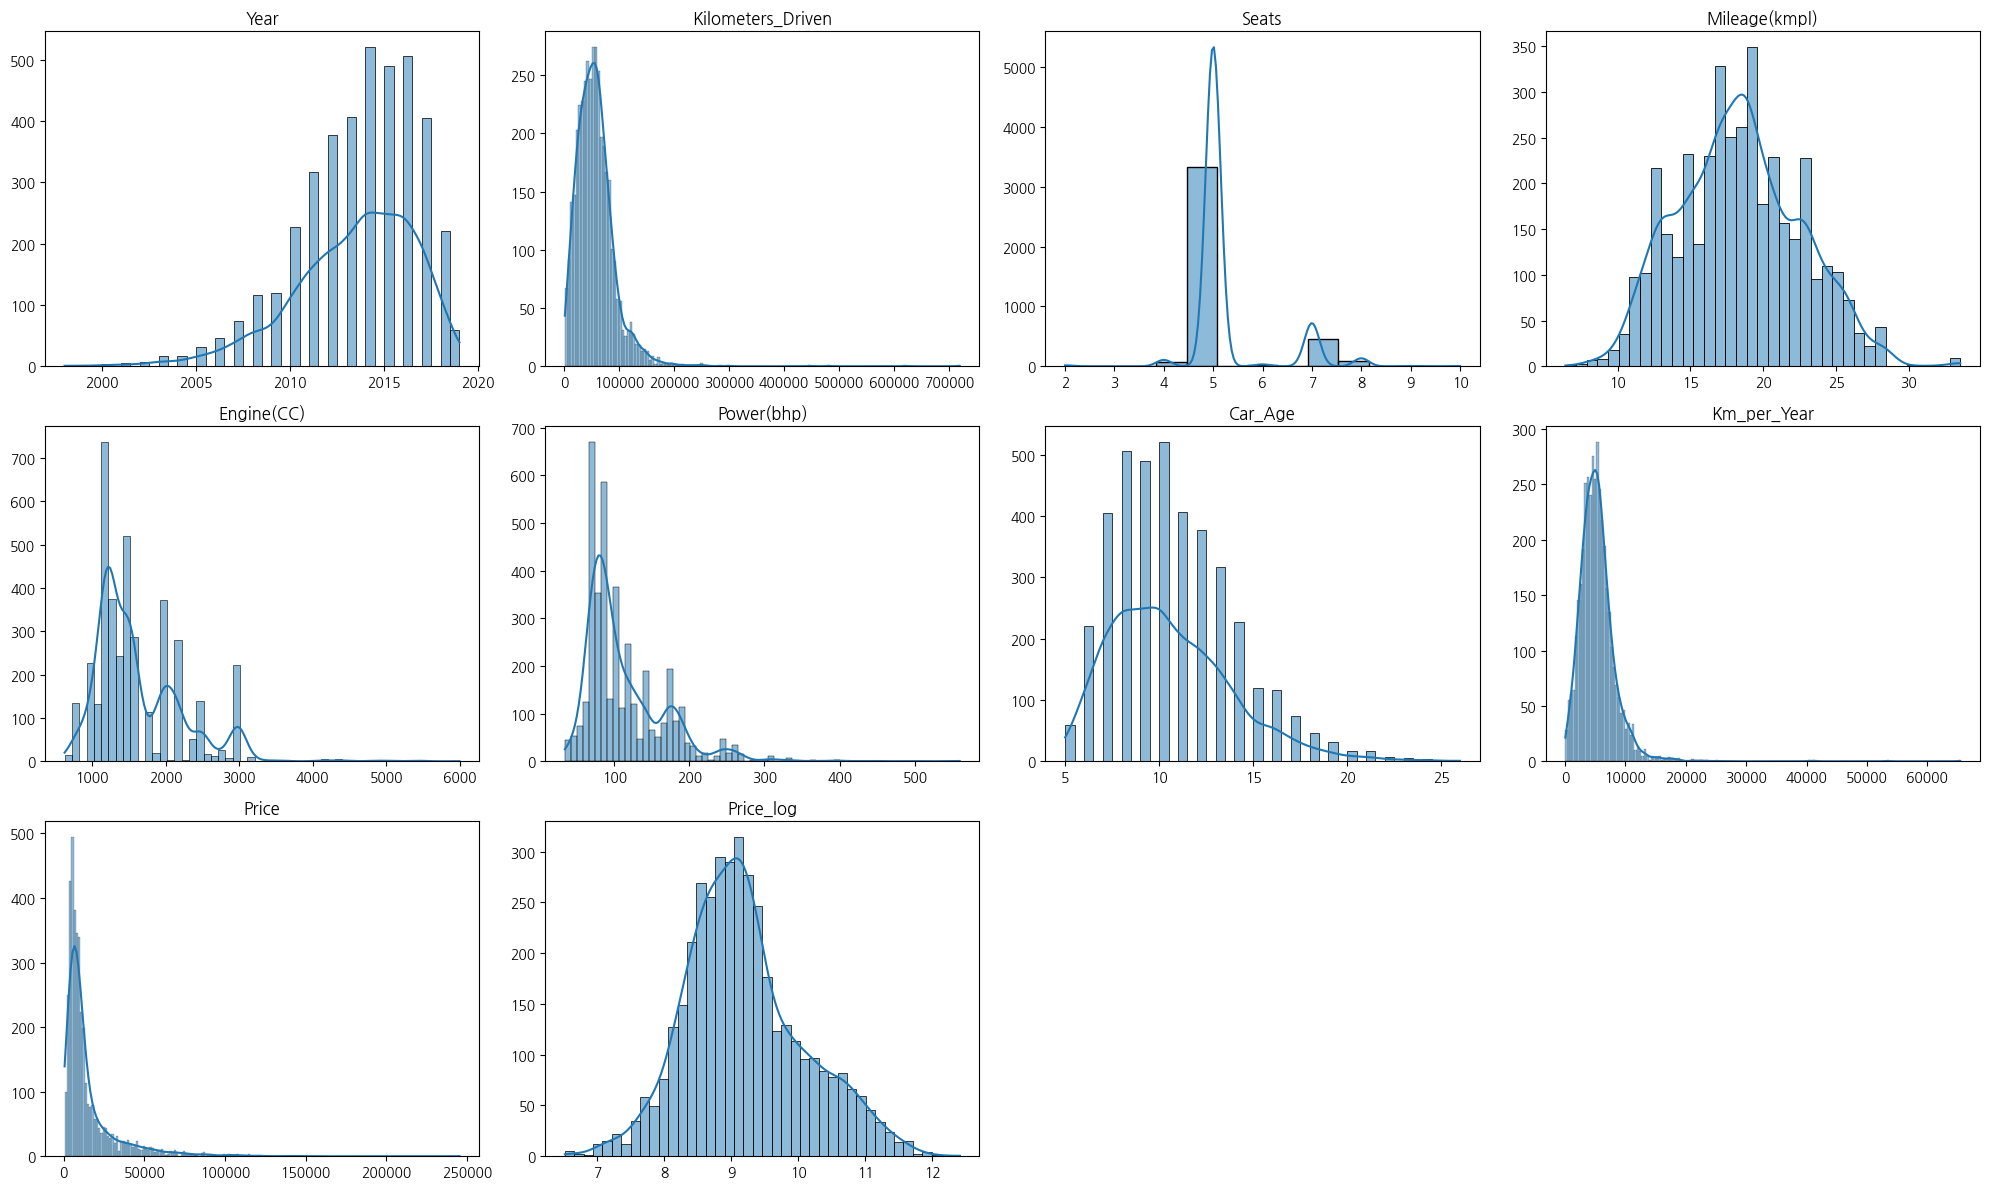

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 분석 대상 컬럼 리스트
cols = ['Year', 'Kilometers_Driven', 'Seats', 'Mileage(kmpl)', 'Engine(CC)',
        'Power(bhp)', 'Car_Age', 'Km_per_Year', 'Price', 'Price_log']

# 서브플롯 설정 (3행 4열 레이아웃, 여유 있게)
plt.figure(figsize=(20, 12))
for i, col in enumerate(cols):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df_log[col].dropna(), kde=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


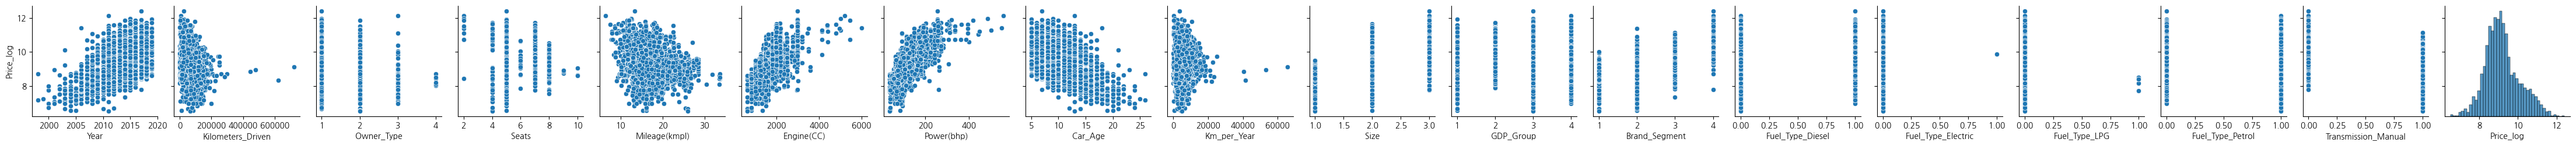

In [13]:
sns.pairplot(df_log, y_vars="Price_log" ,x_vars=df_log.drop(df_log.columns[17], axis=1).columns)

#### mileage log histogram

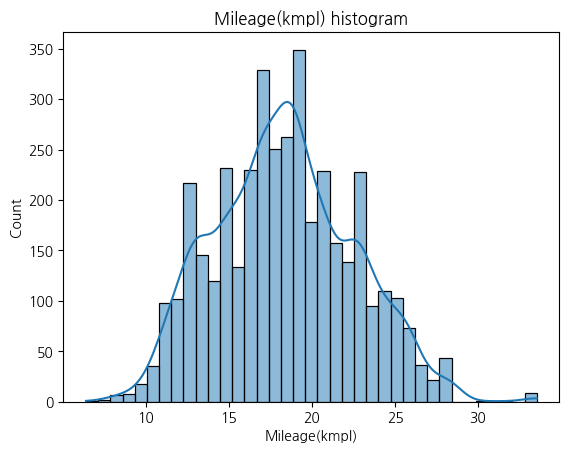

In [14]:
sns.histplot(df_log['Mileage(kmpl)'], kde=True)
plt.title("Mileage(kmpl) histogram")
plt.show()

<Axes: xlabel='Power(bhp)', ylabel='Count'>

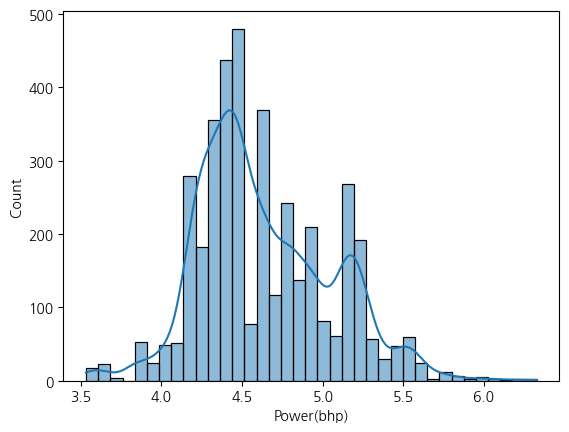

In [15]:
 sns.histplot(np.log(df_combined['Power(bhp)']), kde=True)

In [16]:
# sns.histplot(df_log, kde=True)
# plt.title("log1p(y) histogram")
# plt.show()

In [17]:
#  변수들 간의 경향성 파악
# sns.pairplot(df_combined)

## 상관관계 분석을 통한 경향성 파악

In [18]:
df = df_log.drop(['Fuel_Type_Diesel','Fuel_Type_Electric','Fuel_Type_LPG','Fuel_Type_Petrol','Year','Km_per_Year'],axis=1)

<Axes: >

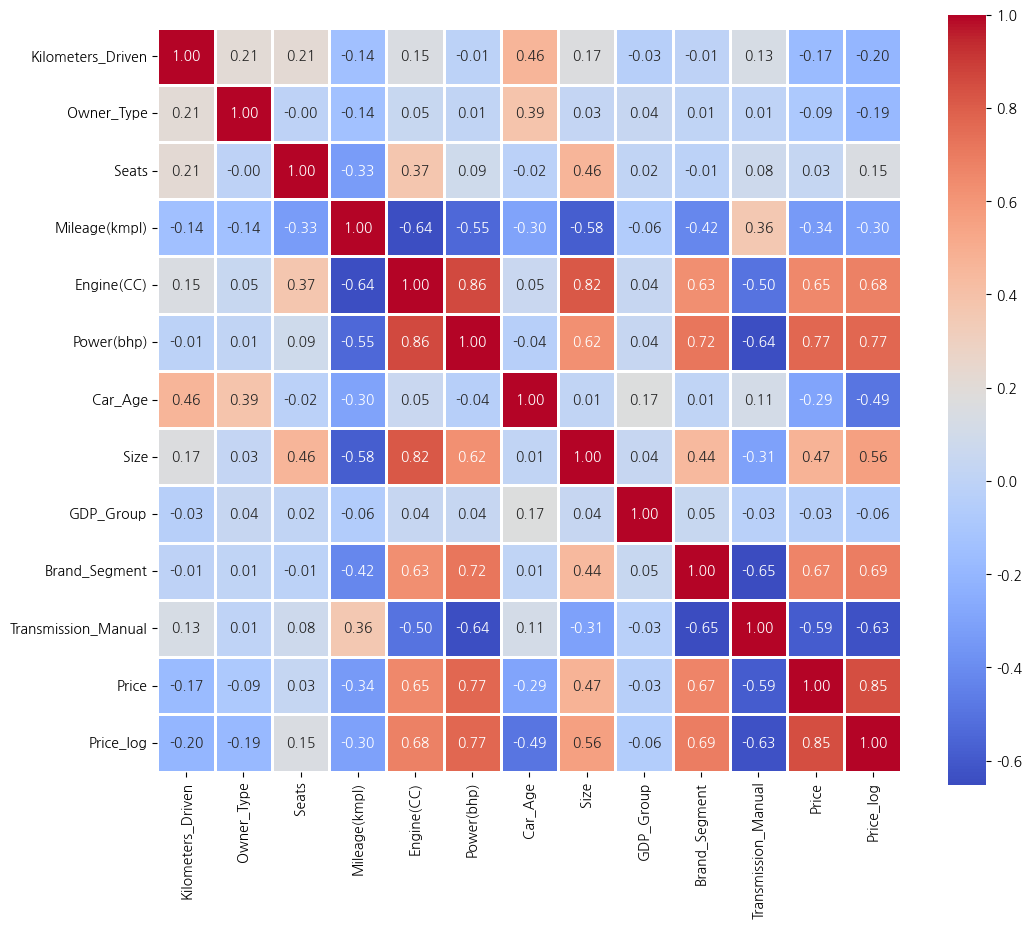

In [19]:
plt.figure(figsize=(12, 10))

sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=1)

In [20]:
# 변수들간의 상관관계 파악

df_combined.corr().round(3)

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size,GDP_Group,Brand_Segment,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Price
Year,1.000,-0.464,-0.386,0.015,0.300,-0.055,0.035,-1.000,-0.040,-0.015,-0.174,-0.007,0.125,-0.012,-0.025,-0.126,-0.112,0.292
Kilometers_Driven,-0.464,1.000,0.210,0.214,-0.143,0.151,-0.011,0.464,0.872,0.167,-0.033,-0.006,0.224,-0.005,0.008,-0.224,0.132,-0.174
Owner_Type,-0.386,0.210,1.000,-0.004,-0.141,0.047,0.015,0.386,0.040,0.030,0.042,0.012,-0.034,-0.007,-0.003,0.034,0.005,-0.087
Seats,0.015,0.214,-0.004,1.000,-0.330,0.374,0.088,-0.015,0.243,0.464,0.015,-0.010,0.300,-0.005,-0.013,-0.294,0.082,0.034
Mileage(kmpl),0.300,-0.143,-0.141,-0.330,1.000,-0.642,-0.547,-0.300,-0.005,-0.583,-0.061,-0.424,0.099,-0.015,0.029,-0.135,0.361,-0.336
Engine(CC),-0.055,0.151,0.047,0.374,-0.642,1.000,0.861,0.055,0.140,0.816,0.042,0.631,0.432,0.018,-0.038,-0.412,-0.499,0.653
Power(bhp),0.035,-0.011,0.015,0.088,-0.547,0.861,1.000,-0.035,0.006,0.623,0.043,0.720,0.305,-0.012,-0.038,-0.283,-0.642,0.774
Car_Age,-1.000,0.464,0.386,-0.015,-0.300,0.055,-0.035,1.000,0.040,0.015,0.174,0.007,-0.125,0.012,0.025,0.126,0.112,-0.292
Km_per_Year,-0.040,0.872,0.040,0.243,-0.005,0.140,0.006,0.040,1.000,0.178,-0.128,-0.013,0.323,-0.010,-0.002,-0.323,0.097,-0.061
Size,-0.015,0.167,0.030,0.464,-0.583,0.816,0.623,0.015,0.178,1.000,0.041,0.439,0.449,0.027,-0.044,-0.420,-0.306,0.471


In [21]:
df_combined.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size,GDP_Group,Brand_Segment,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Price
0,2015,33425,1,5.0,17.43,1396.0,105.50,9,3713.889,2,4,2,0,0,0,1,1,6898.32
1,2011,62148,1,5.0,11.70,1796.0,178.00,13,4780.615,2,4,4,0,0,0,1,1,13490.05
2,2012,106000,1,8.0,12.99,2494.0,100.00,12,8833.333,3,4,3,1,0,0,0,1,12876.86
3,2015,27000,1,5.0,17.97,1498.0,99.60,9,3000.000,2,3,2,0,0,0,1,0,10347.48
4,2015,24350,2,5.0,19.81,1086.0,68.05,9,2705.556,2,4,2,0,0,0,1,1,4598.88


<Axes: >

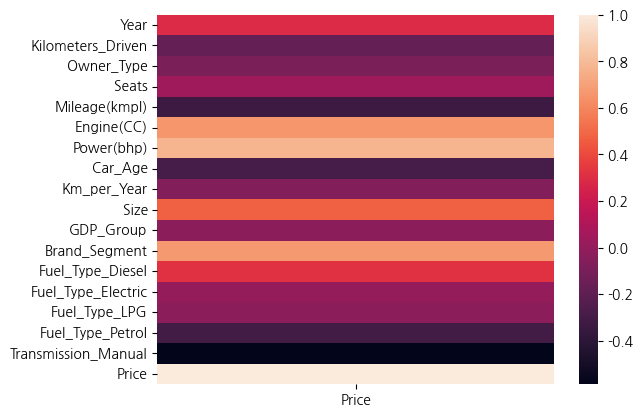

In [22]:
sns.heatmap(df_combined.corr()[['Price']].round(3))

## 회귀모델 생성

log를 하지 않은 선형 회귀 분석

In [23]:
# 선형 회귀 분석 : formula(y ~ X1 + X2 + ...) 이용. 상수항(Intercept) 자동 추가. 코드 중간에서 줄 바꿈 “\” 추가
reg_model = smf.ols(formula = "Price ~ Year + Kilometers_Driven + Owner_Type + Seats + Q('Mileage(kmpl)') + Q('Engine(CC)') + Q('Power(bhp)') + Car_Age + Km_per_Year + Size + GDP_Group + Brand_Segment + Fuel_Type_Diesel + Fuel_Type_Electric + Fuel_Type_LPG + Fuel_Type_Petrol + Transmission_Manual", data = df_combined)

# 적합
reg_result = reg_model.fit()

print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     598.2
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:56:55   Log-Likelihood:                -42076.
No. Observations:                3964   AIC:                         8.419e+04
Df Residuals:                    3947   BIC:                         8.429e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.8016    

Kilometers_Driven, Seats, Q('Engine(CC)'), Q('Power(bhp)'), Car_Age, Km_per_Year, GDP_Group, Brand_Segment, Fuel_Type_Petrol, Transmission_Manual < 0.05 유의  


Year는 애매. 

log를 씌운 선형 회귀 

In [24]:
# Price에 로그를 했더니 성능 상승!!
reg_model = smf.ols(formula = "Price_log ~ Year + Kilometers_Driven + Owner_Type + Seats + Q('Mileage(kmpl)') + Q('Engine(CC)') + Q('Power(bhp)') + Car_Age + Km_per_Year + Size + GDP_Group + Brand_Segment + Fuel_Type_Diesel + Fuel_Type_Electric + Fuel_Type_LPG + Fuel_Type_Petrol + Transmission_Manual", data = df_log)

# 적합
reg_result = reg_model.fit()

print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     2030.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:56:56   Log-Likelihood:                -743.36
No. Observations:                3964   AIC:                             1521.
Df Residuals:                    3947   BIC:                             1628.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -6.059e-05   1

In [25]:
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_log.drop(['Price','Price_log'], axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x) 
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                 for i in range(df_train_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
0,const,0.00
14,Fuel_Type_Electric,1.04
11,GDP_Group,1.07
15,Fuel_Type_LPG,1.15
3,Owner_Type,1.18
4,Seats,1.86
17,Transmission_Manual,2.12
12,Brand_Segment,2.57
5,Mileage(kmpl),3.52
10,Size,3.76


Kilometers_Driven의 VIF가 높음   
Year와 Car_Age의 VIF 값이 **inf (무한대)**로 나오는 이유는, 두 변수가 완전히 선형 종속(완전한 다중공선성) 관계

Year 제거

In [26]:
# 선형 회귀 분석 : Year만 제거
reg_model = smf.ols(formula = "Price_log ~  Kilometers_Driven + Owner_Type + Seats + Q('Mileage(kmpl)') + Q('Engine(CC)') + Q('Power(bhp)') + Car_Age + Km_per_Year + Size + GDP_Group + Brand_Segment + Fuel_Type_Diesel + Fuel_Type_Electric + Fuel_Type_LPG + Fuel_Type_Petrol + Transmission_Manual", data = df_log)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     2030.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:56:56   Log-Likelihood:                -743.36
No. Observations:                3964   AIC:                             1521.
Df Residuals:                    3947   BIC:                             1628.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.8866    

In [27]:
# Year 제거한 다중 공선성 재확인
df_train_x = df_log.drop(['Price','Year','Price_log'], axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x) 
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                 for i in range(df_train_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
13,Fuel_Type_Electric,1.04
10,GDP_Group,1.07
14,Fuel_Type_LPG,1.15
2,Owner_Type,1.18
3,Seats,1.86
16,Transmission_Manual,2.12
11,Brand_Segment,2.57
4,Mileage(kmpl),3.52
9,Size,3.76
7,Car_Age,4.68


Fuel_Type의 다중 공선성이 높게 나옴 제거 하기)

In [28]:
# 선형 회귀 분석 : formula(y ~ X1 + X2 + ...) 이용. 상수항(Intercept) 자동 추가. 코드 중간에서 줄 바꿈 “\” 추가
reg_model = smf.ols(formula = "Price_log ~  Owner_Type + Seats + Q('Mileage(kmpl)') + Q('Engine(CC)') + Q('Power(bhp)') + Car_Age + Kilometers_Driven + Size + GDP_Group + Brand_Segment + Transmission_Manual", data = df_log)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     2758.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:56:56   Log-Likelihood:                -865.83
No. Observations:                3964   AIC:                             1756.
Df Residuals:                    3952   BIC:                             1831.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.0335    

In [29]:
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_log.drop(['Price','Year','Price_log','Fuel_Type_Diesel', 'Fuel_Type_Electric','Fuel_Type_LPG', 'Fuel_Type_Petrol','Kilometers_Driven'], axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x) 
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                 for i in range(df_train_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
9,GDP_Group,1.06
7,Km_per_Year,1.15
1,Owner_Type,1.18
6,Car_Age,1.52
2,Seats,1.77
11,Transmission_Manual,2.11
3,Mileage(kmpl),2.18
10,Brand_Segment,2.44
8,Size,3.49
5,Power(bhp),6.66


Kilometers_Driven과 Km_per_Year의 비슷함? 으로 인해 다중공선성 Km_per_Year 제거
다중공선성 10이하

In [30]:
# 선형 회귀 분석 : formula(y ~ X1 + X2 + ...) 이용. 상수항(Intercept) 자동 추가. 코드 중간에서 줄 바꿈 “\” 추가
reg_model = smf.ols(formula = "Price_log ~  Owner_Type + Seats + Q('Mileage(kmpl)') + Q('Engine(CC)') + Q('Power(bhp)') + Car_Age + Km_per_Year + Size + GDP_Group + Brand_Segment +  Transmission_Manual", data = df_log)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     2761.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:56:56   Log-Likelihood:                -864.24
No. Observations:                3964   AIC:                             1752.
Df Residuals:                    3952   BIC:                             1828.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.0376    

VIF가 10 미만으로 다중공선성 해결

## 회귀모델 생성 - 유의한 설명변수 확인

In [31]:
# 최종 회귀모델
reg_model = smf.ols(formula = "Price_log ~  Owner_Type + Seats + Q('Mileage(kmpl)') + Q('Engine(CC)') + Q('Power(bhp)') + Car_Age + Km_per_Year + Size + GDP_Group + Brand_Segment +  Transmission_Manual", data = df_log)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     2761.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:56:56   Log-Likelihood:                -864.24
No. Observations:                3964   AIC:                             1752.
Df Residuals:                    3952   BIC:                             1828.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.0376    

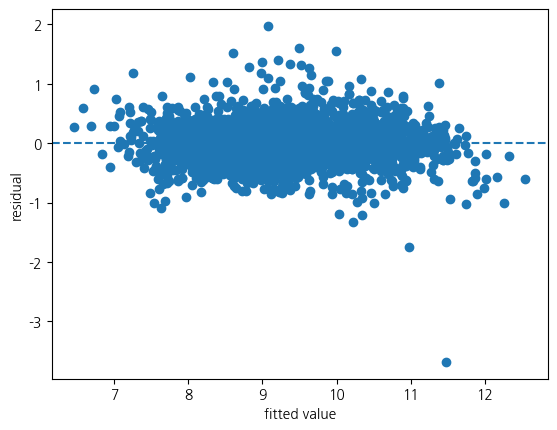

In [32]:
# 58 Page
# 잔차 산점도: X-예측값, Y-잔차 
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

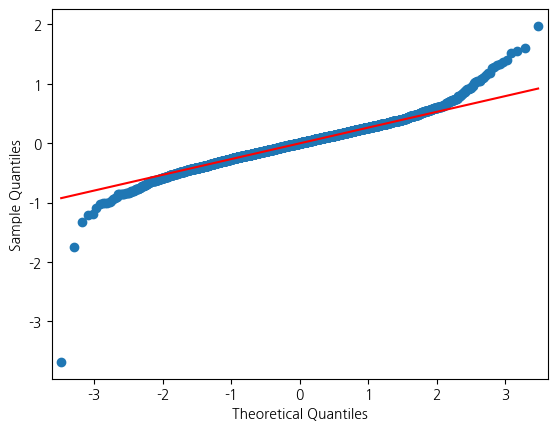

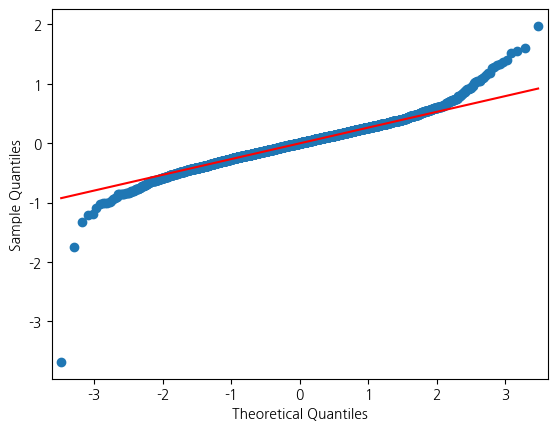

In [33]:
# 잔차 정규성 검정:Q-Q plot. s-standardized line, 
#  r-regression line, q-quartiles
qqplot(reg_result.resid, line = "q")

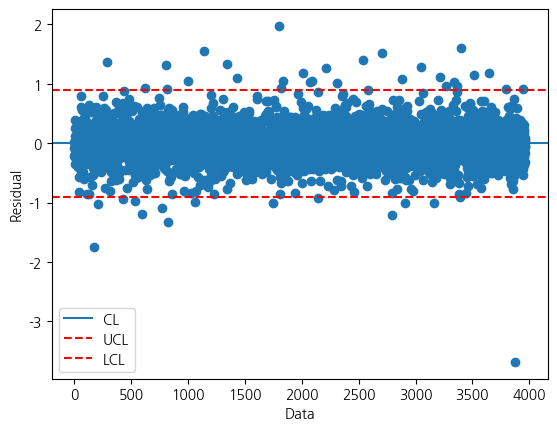

In [34]:
# 59 Page
# 잔차의 독립성 확인
plt.scatter(df_log.index, reg_result.resid)
plt.xlabel("Data")  ;  plt.ylabel("Residual")
plt.axhline(y=0,linestyle="-", label='CL')
plt.axhline(y=3*np.std(reg_result.resid),linestyle="--",color="red",label='UCL' )
plt.axhline(y=-3*np.std(reg_result.resid),linestyle="dashed",color="red",label='LCL')
plt.legend()

In [35]:
# 60 Page
# 평가용 데이터에 대한 성능 확인
train_pred = reg_result.predict(df_log)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수:", r2_score(df_log['Price_log'], train_pred))
print("test data의 결정계수:", r2_score(df_test['Price_log'], test_pred))

train data의 결정계수: 0.8848450246113049
test data의 결정계수: 0.8853688500881794


In [36]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
print('test data의 실제값 : \n', df_test['Price_log'].head(10))
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 0     9.617405
1     9.161222
2     9.214521
3     8.629861
4    10.255461
5     9.206858
6     9.349946
7     8.782028
8     8.466569
9     8.721413
Name: Price_log, dtype: float64
test data의 예측값 : 
 0     9.534492
1     9.261208
2     8.857284
3     8.372865
4    10.462014
5     9.225445
6     9.217143
7     9.227680
8     8.240384
9     8.622094
dtype: float64


In [37]:
# 61 Page
# RFE(recursive feature elimination) 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
# 목표변수/설명변수 분리
df_train_y = df_log["Price_log"]
df_train_x = df_log.drop('Price_log', axis = 1)
# sklearn의 선형회귀 모델
model = LinearRegression()
# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_train_x, df_train_y)
# 선택된 변수
selected_cols = df_train_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_train_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols)) 
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['Year', 'Car_Age', 'Size', 'Brand_Segment', 'Transmission_Manual'], dtype='object')
Removed Variables : Index(['Kilometers_Driven', 'Owner_Type', 'Seats', 'Mileage(kmpl)',
       'Engine(CC)', 'Power(bhp)', 'Km_per_Year', 'GDP_Group',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Price'],
      dtype='object')


In [38]:
# 최종 회귀모델
reg_model = smf.ols(formula = "Price_log ~  Owner_Type + Seats + Q('Mileage(kmpl)') + Q('Engine(CC)') + Q('Power(bhp)') + Car_Age + Km_per_Year + Size + GDP_Group + Brand_Segment +  Transmission_Manual", data = df_test)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     699.7
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:56:57   Log-Likelihood:                -181.24
No. Observations:                 991   AIC:                             386.5
Df Residuals:                     979   BIC:                             445.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.2177    

<Axes: >

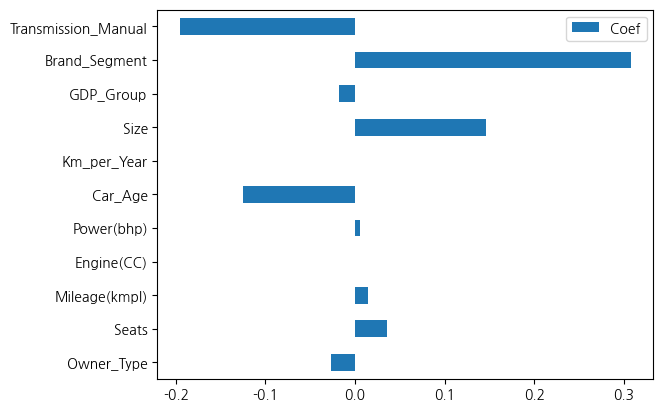

In [39]:
# 63 Page
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:]},  
                           index = ['Owner_Type', 'Seats','Mileage(kmpl)','Engine(CC)', 'Power(bhp)',  'Car_Age', 'Km_per_Year', 'Size', 'GDP_Group','Brand_Segment',  'Transmission_Manual'])
df_reg_coef.plot.barh(y = "Coef")

In [40]:
df_log[]

SyntaxError: invalid syntax (646486526.py, line 1)